In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
%matplotlib inline

In [2]:
# Import CreditOne Data
credit = pd.read_csv('defaultOfCreditCardClients.csv', header =1)
credit.sample(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Sept_Status,Aug_Status,July_Status,June_Status,...,June_Bill,May_Bill,April_Bill,Sept_Paid,Aug_Paid,July_Paid,June_Paid,May_Paid,April_Paid,Default
12213,12214,100000,2,1,2,28,-1,-1,-1,-1,...,2300,1132,2072,1033,3667,2300,1132,2072,2692,0
22943,22944,80000,2,2,1,34,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
1328,1329,140000,1,2,1,41,0,0,0,0,...,114348,111382,112458,5600,5600,4500,4200,4500,4500,0


In [3]:
# Inspect top 5 observations
# Updated data description
# https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset/discussion/34608
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Sept_Status,Aug_Status,July_Status,June_Status,...,June_Bill,May_Bill,April_Bill,Sept_Paid,Aug_Paid,July_Paid,June_Paid,May_Paid,April_Paid,Default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# Understand the makeup of the data
# Note that EDU and MARRIAGE have values outside of the documentation 
# Note that Each of the Status attributs need to be remapped from -1 to 9 
# If we want to get ALL attributes 
# https://stackoverflow.com/questions/24524104/pandas-describe-is-not-returning-summary-of-all-columns
# unstacked3 = creditRev.describe(include = 'all').unstack
# print(unstacked3)

credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Sept_Status,Aug_Status,July_Status,June_Status,...,June_Bill,May_Bill,April_Bill,Sept_Paid,Aug_Paid,July_Paid,June_Paid,May_Paid,April_Paid,Default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
# Check Data Types
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID              30000 non-null int64
LIMIT_BAL       30000 non-null int64
SEX             30000 non-null int64
EDUCATION       30000 non-null int64
MARRIAGE        30000 non-null int64
AGE             30000 non-null int64
Sept_Status     30000 non-null int64
Aug_Status      30000 non-null int64
July_Status     30000 non-null int64
June_Status     30000 non-null int64
May_Status      30000 non-null int64
April_Status    30000 non-null int64
Sept_Bill       30000 non-null int64
Aug_Bill        30000 non-null int64
July_Bill       30000 non-null int64
June_Bill       30000 non-null int64
May_Bill        30000 non-null int64
April_Bill      30000 non-null int64
Sept_Paid       30000 non-null int64
Aug_Paid        30000 non-null int64
July_Paid       30000 non-null int64
June_Paid       30000 non-null int64
May_Paid        30000 non-null int64
April_Paid      30000 non-null int64
Def

In [8]:
# Correlation - investigate iloc http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.iloc.html
corrMat = credit.corr()
print(corrMat)

                    ID  LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE  \
ID            1.000000   0.026179  0.018497   0.039177 -0.029079  0.018678   
LIMIT_BAL     0.026179   1.000000  0.024755  -0.219161 -0.108139  0.144713   
SEX           0.018497   0.024755  1.000000   0.014232 -0.031389 -0.090874   
EDUCATION     0.039177  -0.219161  0.014232   1.000000 -0.143464  0.175061   
MARRIAGE     -0.029079  -0.108139 -0.031389  -0.143464  1.000000 -0.414170   
AGE           0.018678   0.144713 -0.090874   0.175061 -0.414170  1.000000   
Sept_Status  -0.030575  -0.271214 -0.057643   0.105364  0.019917 -0.039447   
Aug_Status   -0.011215  -0.296382 -0.070771   0.121566  0.024199 -0.050148   
July_Status  -0.018494  -0.286123 -0.066096   0.114025  0.032688 -0.053048   
June_Status  -0.002735  -0.267460 -0.060173   0.108793  0.033122 -0.049722   
May_Status   -0.022199  -0.249411 -0.055064   0.097520  0.035629 -0.053826   
April_Status -0.020270  -0.235195 -0.044008   0.082316  0.034345

In [18]:
# Let's use iloc to print misssing features in corrMat
# https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/
# https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-6fcd0170be9c
print(corrMat.iloc[ : , 10:15])

              May_Status  April_Status  Sept_Bill  Aug_Bill  July_Bill
ID             -0.022199     -0.020270   0.019389  0.017982   0.024354
LIMIT_BAL      -0.249411     -0.235195   0.285430  0.278314   0.283236
SEX            -0.055064     -0.044008  -0.033642 -0.031183  -0.024563
EDUCATION       0.097520      0.082316   0.023581  0.018749   0.013002
MARRIAGE        0.035629      0.034345  -0.023472 -0.021602  -0.024909
AGE            -0.053826     -0.048773   0.056239  0.054283   0.053710
Sept_Status     0.509426      0.474553   0.187068  0.189859   0.179785
Aug_Status      0.622780      0.575501   0.234887  0.235257   0.224146
July_Status     0.686775      0.632684   0.208473  0.237295   0.227494
June_Status     0.819835      0.716449   0.202812  0.225816   0.244983
May_Status      1.000000      0.816900   0.206684  0.226913   0.243335
April_Status    0.816900      1.000000   0.207373  0.226924   0.241181
Sept_Bill       0.206684      0.207373   1.000000  0.951484   0.892279
Aug_Bi

In [24]:
# Let's try to print all by changing numpy's print settings
# https://stackoverflow.com/questions/1987694/how-to-print-the-full-numpy-array
import reprlib
print(reprlib.repr(corrMat))

             ... x 25 columns]


In [6]:
credit.groupby('Sept_Status')['Sept_Status'].count()

Sept_Status
-2     2759
-1     5686
 0    14737
 1     3688
 2     2667
 3      322
 4       76
 5       26
 6       11
 7        9
 8       19
Name: Sept_Status, dtype: int64

In [8]:
credit.groupby('SEX')['SEX'].count()

SEX
1    11888
2    18112
Name: SEX, dtype: int64

In [9]:
# Null ID https://www.pythoncentral.io/python-null-equivalent-none/
credit.ID = None
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID              0 non-null object
LIMIT_BAL       30000 non-null int64
SEX             30000 non-null int64
EDUCATION       30000 non-null int64
MARRIAGE        30000 non-null int64
AGE             30000 non-null int64
Sept_Status     30000 non-null int64
Aug_Status      30000 non-null int64
July_Status     30000 non-null int64
June_Status     30000 non-null int64
May_Status      30000 non-null int64
April_Status    30000 non-null int64
Sept_Bill       30000 non-null int64
Aug_Bill        30000 non-null int64
July_Bill       30000 non-null int64
June_Bill       30000 non-null int64
May_Bill        30000 non-null int64
April_Bill      30000 non-null int64
Sept_Paid       30000 non-null int64
Aug_Paid        30000 non-null int64
July_Paid       30000 non-null int64
June_Paid       30000 non-null int64
May_Paid        30000 non-null int64
April_Paid      30000 non-null int64
Defaul

In [10]:
# Get counts of education levels
credit.groupby('EDUCATION')['EDUCATION'].count()

EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: EDUCATION, dtype: int64

In [11]:
# From the data documentation EDUCATION can only have the values 1, 2, 3, and 4. 
# Let's drop all ovbservations that contain 0, 5 and 6 for EDU. 
# Will need to re-output csv file
# credit = credit[credit.EDUCATION != 0]
# credit = credit[credit.EDUCATION != 5]
# credit = credit[credit.EDUCATION != 6]

In [12]:
# Get counts of education levels to confirm delete
credit.groupby('EDUCATION')['EDUCATION'].count()

EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: EDUCATION, dtype: int64

In [13]:
# Check number of observations
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID              0 non-null object
LIMIT_BAL       30000 non-null int64
SEX             30000 non-null int64
EDUCATION       30000 non-null int64
MARRIAGE        30000 non-null int64
AGE             30000 non-null int64
Sept_Status     30000 non-null int64
Aug_Status      30000 non-null int64
July_Status     30000 non-null int64
June_Status     30000 non-null int64
May_Status      30000 non-null int64
April_Status    30000 non-null int64
Sept_Bill       30000 non-null int64
Aug_Bill        30000 non-null int64
July_Bill       30000 non-null int64
June_Bill       30000 non-null int64
May_Bill        30000 non-null int64
April_Bill      30000 non-null int64
Sept_Paid       30000 non-null int64
Aug_Paid        30000 non-null int64
July_Paid       30000 non-null int64
June_Paid       30000 non-null int64
May_Paid        30000 non-null int64
April_Paid      30000 non-null int64
Defaul

In [14]:
# Get counts of MARRIAGE levels
credit.groupby('MARRIAGE')['MARRIAGE'].count()

MARRIAGE
0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64

In [15]:
# From the data documentation MARRIAGE can only have the values 1, 2, 3.  
# Let's drop all ovbservations that contain 0 for MARRIAGE. 
# Will need to re-output csv file
credit = credit[credit.MARRIAGE != 0]

In [16]:
# Get counts of MARRIAGE levels to confirm delete
credit.groupby('MARRIAGE')['MARRIAGE'].count()

MARRIAGE
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64

In [34]:
# Check number of observations
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29946 entries, 0 to 29999
Data columns (total 26 columns):
ID              0 non-null object
LIMIT_BAL       29946 non-null int64
SEX             29946 non-null int64
EDUCATION       29946 non-null int64
MARRIAGE        29946 non-null int64
AGE             29946 non-null int64
Sept_Status     29946 non-null int64
Aug_Status      29946 non-null int64
July_Status     29946 non-null int64
June_Status     29946 non-null int64
May_Status      29946 non-null int64
April_Status    29946 non-null int64
Sept_Bill       29946 non-null int64
Aug_Bill        29946 non-null int64
July_Bill       29946 non-null int64
June_Bill       29946 non-null int64
May_Bill        29946 non-null int64
April_Bill      29946 non-null int64
Sept_Paid       29946 non-null int64
Aug_Paid        29946 non-null int64
July_Paid       29946 non-null int64
June_Paid       29946 non-null int64
May_Paid        29946 non-null int64
April_Paid      29946 non-null int64
Defaul

In [18]:
# Remap values for the Status attributes
# https://stackoverflow.com/questions/12152716/python-pandas-equivalent-for-replace
# http://pandas.pydata.org/pandas-docs/version/0.17.0/indexing.html#indexing-integer
# https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/

# credit.iloc[ : , 6:12] = credit.iloc[ : , 6:12].replace({-2: -1, -1: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9})

In [35]:
# Check that it worked
credit.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Sept_Status,Aug_Status,July_Status,June_Status,May_Status,...,June_Bill,May_Bill,April_Bill,Sept_Paid,Aug_Paid,July_Paid,June_Paid,May_Paid,April_Paid,Default
count,29946.000000,29946.000000,29946.000000,29946.000000,29946.000000,29946.000000,29946.000000,29946.000000,29946.000000,29946.000000,...,29946.000000,29946.000000,29946.000000,29946.000000,2.994600e+04,29946.000000,29946.000000,29946.000000,29946.000000,29946.000000
mean,167546.573165,1.603486,1.851533,1.554665,35.481300,-0.016430,-0.133641,-0.166132,-0.220397,-0.265945,...,43306.688005,40352.140252,38911.533393,5659.736826,5.926824e+03,5227.841314,4829.614573,4804.211080,5220.871035,0.221432
std,129807.831678,0.489182,0.789773,0.518259,9.218413,1.123467,1.196968,1.196428,1.168882,1.133029,...,64374.889734,60836.076370,59592.166712,16552.642231,2.306022e+04,17618.433069,15677.788192,15290.655486,17791.413753,0.415218
min,10000.000000,1.000000,0.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2335.000000,1770.250000,1261.000000,1000.000000,8.360000e+02,390.000000,298.000000,255.250000,122.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19066.000000,18121.000000,17098.500000,2100.000000,2.010000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54601.750000,50244.750000,49248.500000,5007.000000,5.000000e+03,4511.500000,4015.000000,4040.750000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [20]:
# Change Y to be data type category http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.astype.html
# http://pbpython.com/pandas_dtypes.html
# credit['default payment next month'] = credit['default payment next month'].astype('category')
# credit.info()

In [21]:
# Change other variables to catagory (SEX, EDUCATION, MARRIAGE)
# credit['SEX'] = credit['SEX'].astype('category')
# credit['EDUCATION'] = credit['EDUCATION'].astype('category')
# credit['MARRIAGE'] = credit['MARRIAGE'].astype('category')
# credit.info()

In [36]:
# Binning the Age variable 
# http://benalexkeen.com/bucketing-continuous-variables-in-pandas/
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html
# Can't overwrite original age feature - conflicting data type
credit['AGE_BIN'] = pd.cut(credit['AGE'], 6, labels=["20", "30", "40", "50", "60", "70"])
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Sept_Status,Aug_Status,July_Status,June_Status,...,May_Bill,April_Bill,Sept_Paid,Aug_Paid,July_Paid,June_Paid,May_Paid,April_Paid,Default,AGE_BIN
0,None,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,20
1,None,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,20
2,None,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,30
3,None,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,30
4,None,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,50


In [23]:
# Write CSV 
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html 
# https://stackoverflow.com/questions/29310792/how-to-save-a-list-as-a-csv-file-with-python-with-new-lines
credit.to_csv('creditClean.csv')

In [24]:
# EDA 

In [37]:
# Check out first 5 rows
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Sept_Status,Aug_Status,July_Status,June_Status,...,May_Bill,April_Bill,Sept_Paid,Aug_Paid,July_Paid,June_Paid,May_Paid,April_Paid,Default,AGE_BIN
0,None,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,20
1,None,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,20
2,None,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,30
3,None,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,30
4,None,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,50


In [38]:
# Get Column Names
header = credit.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'Sept_Status',
       'Aug_Status', 'July_Status', 'June_Status', 'May_Status',
       'April_Status', 'Sept_Bill', 'Aug_Bill', 'July_Bill', 'June_Bill',
       'May_Bill', 'April_Bill', 'Sept_Paid', 'Aug_Paid', 'July_Paid',
       'June_Paid', 'May_Paid', 'April_Paid', 'Default', 'AGE_BIN'],
      dtype='object')


In [39]:
# Information about the data
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29946 entries, 0 to 29999
Data columns (total 26 columns):
ID              0 non-null object
LIMIT_BAL       29946 non-null int64
SEX             29946 non-null int64
EDUCATION       29946 non-null int64
MARRIAGE        29946 non-null int64
AGE             29946 non-null int64
Sept_Status     29946 non-null int64
Aug_Status      29946 non-null int64
July_Status     29946 non-null int64
June_Status     29946 non-null int64
May_Status      29946 non-null int64
April_Status    29946 non-null int64
Sept_Bill       29946 non-null int64
Aug_Bill        29946 non-null int64
July_Bill       29946 non-null int64
June_Bill       29946 non-null int64
May_Bill        29946 non-null int64
April_Bill      29946 non-null int64
Sept_Paid       29946 non-null int64
Aug_Paid        29946 non-null int64
July_Paid       29946 non-null int64
June_Paid       29946 non-null int64
May_Paid        29946 non-null int64
April_Paid      29946 non-null int64
Defaul

In [40]:
# Get number of defaults
credit.groupby('Default')['Default'].count()

Default
0    23315
1     6631
Name: Default, dtype: int64

In [41]:
# Probablility of default
credit.Default.sum() / len(credit.Default)

0.22143191077272423

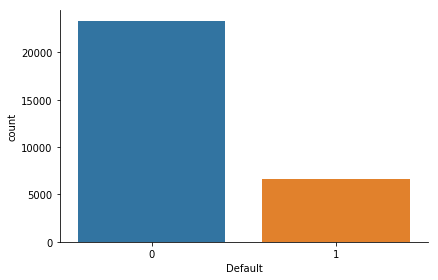

In [42]:
# Instead of a group by, use seaborn to plot the count defaults
fg = sns.factorplot('Default', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('Default')

In [43]:
# Get counts of gender
credit.groupby('SEX')['SEX'].count()

SEX
1    11874
2    18072
Name: SEX, dtype: int64

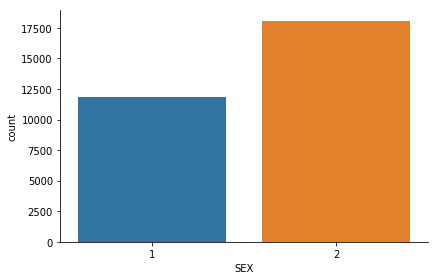

In [44]:
# Instead of a group by, use seaborn to plot the count gender
fg = sns.factorplot('SEX', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('SEX')

In [47]:
# Get number of defaults by sex 
credit.groupby(['SEX', 'Default']) ['SEX'].count()
gender_Default

Default,0,1
SEX,,
1,9003,2871
2,14312,3760


In [48]:
# Get number of defaults by gender 
gender_Default = credit.groupby(['SEX', 'Default']).size().unstack(1)
gender_Default

Default,0,1
SEX,,
1,9003,2871
2,14312,3760


In [49]:
# Lets look at that with crosstabs
pd.crosstab(credit.SEX, credit.Default)

Default,0,1
SEX,,
1,9003,2871
2,14312,3760


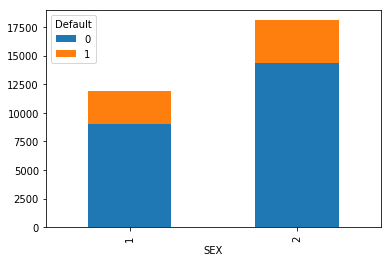

In [50]:
# Let's stack this chart
gender_Default.plot(kind='bar', stacked=True)

In [51]:
# Let's look at the percent of default by gender
# males = 1 
# females = 2 

gender_Default['Percent'] = (gender_Default[1] / (gender_Default[0] + gender_Default[1]))
gender_Default

Default,0,1,Percent
SEX,,,
1,9003,2871,0.241789
2,14312,3760,0.208057


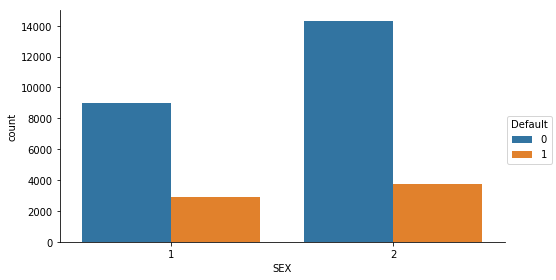

In [52]:
# Instead of a group by, use seaborn to plot gender by default
fg = sns.factorplot('SEX', data=credit, hue = 'Default', kind ='count', aspect=1.75)
fg.set_xlabels('SEX')

In [53]:
# Number of defaults by age
credit.pivot_table('SEX', 'AGE_BIN','Default', aggfunc=np.sum, margins=True)

Default,0,1,All
AGE_BIN,,,
20,14137,4027,18164
30,13660,3365,17025
40,7252,2144,9396
50,2223,711,2934
60,328,134,462
70,27,10,37
All,37627,10391,48018


In [54]:
# Get number of defaults by age bin
credit.groupby(['AGE_BIN', 'Default']) ['AGE_BIN'].count()

AGE_BIN  Default
20       0          8532
         1          2469
30       0          8502
         1          2189
40       0          4594
         1          1396
50       0          1444
         1           481
60       0           225
         1            89
70       0            18
         1             7
Name: AGE_BIN, dtype: int64

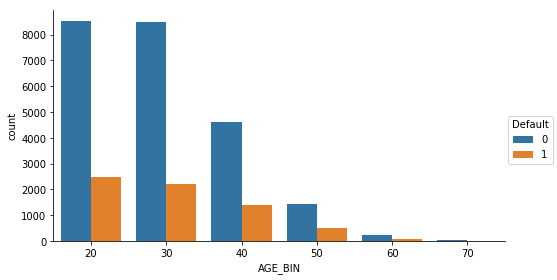

In [55]:
# Instead of a group by, use seaborn to plot 
fg = sns.factorplot('AGE_BIN', data=credit, hue = 'Default', kind ='count', aspect=1.75)
fg.set_xlabels('AGE_BIN')

In [56]:
# Get number of defaults by education level
credit.groupby(['EDUCATION', 'Default']) ['EDUCATION'].count()

EDUCATION  Default
0          0             14
1          0           8545
           1           2036
2          0          10695
           1           3329
3          0           3640
           1           1233
4          0            116
           1              7
5          0            262
           1             18
6          0             43
           1              8
Name: EDUCATION, dtype: int64

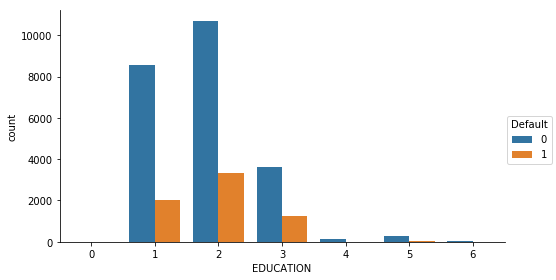

In [57]:
# Instead of a group by, use seaborn to plot 
fg = sns.factorplot('EDUCATION', data=credit, hue = 'Default', kind ='count', aspect=1.75)
fg.set_xlabels('EDUCATION')

In [58]:
# Get number of defaults by marital status
credit.groupby(['MARRIAGE', 'Default']) ['MARRIAGE'].count()

MARRIAGE  Default
1         0          10453
          1           3206
2         0          12623
          1           3341
3         0            239
          1             84
Name: MARRIAGE, dtype: int64

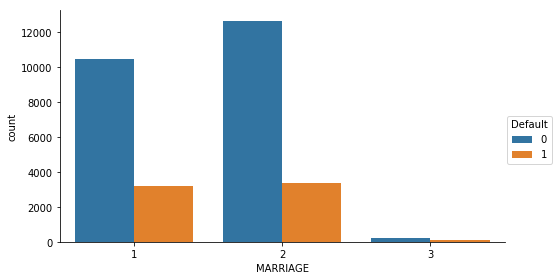

In [59]:
# Instead of a group by, use seaborn to plot 
fg = sns.factorplot('MARRIAGE', data=credit, hue = 'Default', kind ='count', aspect=1.75)
fg.set_xlabels('MARRIAGE')

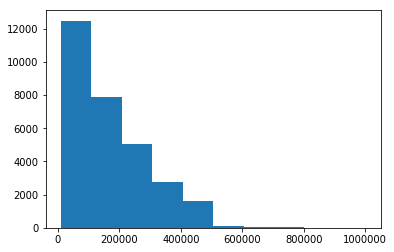

In [60]:
# Create first histogram
plt.hist(credit['LIMIT_BAL'])
plt.show()

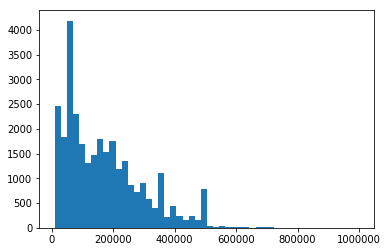

In [61]:
# Use bins in histogram
plt.hist(credit['LIMIT_BAL'], bins=50)
plt.show()

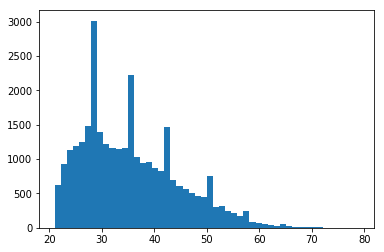

In [62]:
# Inspect Age
plt.hist(credit['AGE'], bins=50)
plt.show()

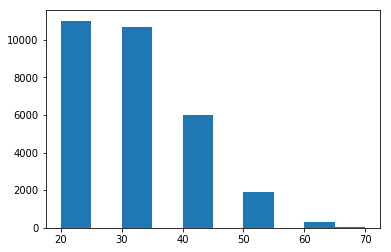

In [63]:
# Inspect Age Bins
plt.hist(credit['AGE_BIN'])
plt.show()

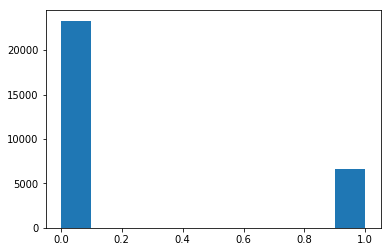

In [66]:
# Inspect Default
plt.hist(credit['Default'])
plt.show()

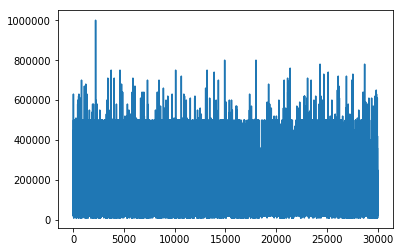

In [67]:
# Line Plot
plt.plot(credit['LIMIT_BAL'])
plt.show()

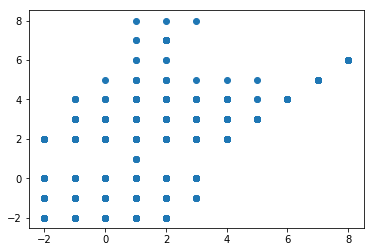

In [68]:
# Scatter Plots
x = credit['Sept_Status']
y = credit['July_Status']
plt.scatter(x,y)

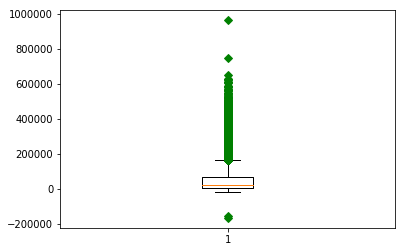

In [69]:
# Box Plot
A = credit['Sept_Bill']
plt.boxplot(A,0,'gD')
plt.show()

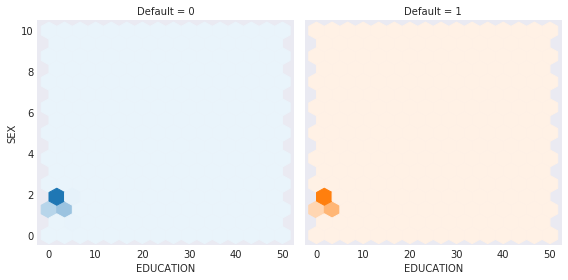

In [88]:
# https://seaborn.pydata.org/tutorial/axis_grids.html
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)
    
with sns.axes_style("dark"):
    g = sns.FacetGrid(credit, hue="Default", col="Default", size=4)
g.map(hexbin, "EDUCATION", "SEX", extent=[0, 50, 0, 10]);

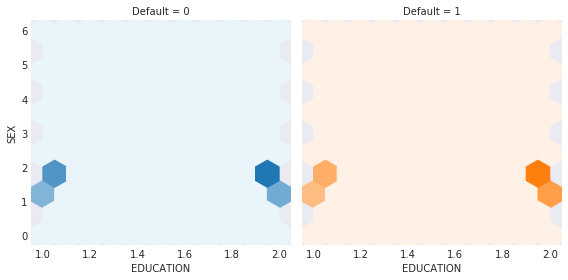

In [93]:
# https://seaborn.pydata.org/tutorial/axis_grids.html
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=10, cmap=cmap, **kwargs)
    
with sns.axes_style("dark"):
    g = sns.FacetGrid(credit, hue="Default", col="Default", size=4)
g.map(hexbin, "EDUCATION", "SEX", extent=[1, 2, 0, 6]);

In [75]:
# For Correlation we need all attributs to be numeric. Let's reimport but with a new df name
creditInt = pd.read_csv('defaultOfCreditCardClients.csv', header =1)

In [76]:
# Correlation - investigate iloc http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.iloc.html
corrMat = creditInt.corr()
print(corrMat)

                    ID  LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE  \
ID            1.000000   0.026179  0.018497   0.039177 -0.029079  0.018678   
LIMIT_BAL     0.026179   1.000000  0.024755  -0.219161 -0.108139  0.144713   
SEX           0.018497   0.024755  1.000000   0.014232 -0.031389 -0.090874   
EDUCATION     0.039177  -0.219161  0.014232   1.000000 -0.143464  0.175061   
MARRIAGE     -0.029079  -0.108139 -0.031389  -0.143464  1.000000 -0.414170   
AGE           0.018678   0.144713 -0.090874   0.175061 -0.414170  1.000000   
Sept_Status  -0.030575  -0.271214 -0.057643   0.105364  0.019917 -0.039447   
Aug_Status   -0.011215  -0.296382 -0.070771   0.121566  0.024199 -0.050148   
July_Status  -0.018494  -0.286123 -0.066096   0.114025  0.032688 -0.053048   
June_Status  -0.002735  -0.267460 -0.060173   0.108793  0.033122 -0.049722   
May_Status   -0.022199  -0.249411 -0.055064   0.097520  0.035629 -0.053826   
April_Status -0.020270  -0.235195 -0.044008   0.082316  0.034345

In [77]:
# Covariance
covMat = creditInt.cov()
print(covMat)

                        ID     LIMIT_BAL          SEX     EDUCATION  \
ID            7.500250e+07  2.941664e+07    78.356379    268.154338   
LIMIT_BAL     2.941664e+07  1.683446e+10  1571.050630 -22474.028945   
SEX           7.835638e+01  1.571051e+03     0.239247      0.005502   
EDUCATION     2.681543e+02 -2.247403e+04     0.005502      0.624651   
MARRIAGE     -1.314525e+02 -7.323670e+03    -0.008014     -0.059184   
AGE           1.491057e+03  1.730767e+05    -0.409726      1.275380   
Sept_Status  -2.975726e+02 -3.954593e+04    -0.031685      0.093584   
Aug_Status   -1.162770e+02 -4.603765e+04    -0.041442      0.115025   
July_Status  -1.916922e+02 -4.443225e+04    -0.038694      0.107861   
June_Status  -2.769132e+01 -4.057181e+04    -0.034411      0.100528   
May_Status   -2.178600e+02 -3.667056e+04    -0.030521      0.087340   
April_Status -2.018774e+02 -3.509308e+04    -0.024754      0.074816   
Sept_Bill     1.236447e+07  2.727020e+09 -1211.694332   1372.377644   
Aug_Bi

In [78]:
# Dora https://github.com/NathanEpstein/Dora 
# use Dora
# from Dora import Dora
# dora = Dora()
# dora.configure(output = 'A', data = 'C:\\Users\\amare\\Documents\\U Texas Austin Data Science\\Course 52\\CC_Default.csv')
# dora.data

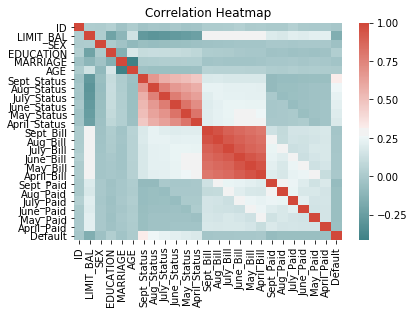

In [82]:
# Create Heat Map
# corr_credit = df_credit.corr()
# print(corr_credit.head(1))
# corr_credit.to_csv('corr.csv')

#print correlation map
cmap = sns.diverging_palette(200, 15, as_cmap=True)
sns.heatmap(corrMat,
            xticklabels=corrMat.columns.values,
            yticklabels=corrMat.columns.values,
            cmap=cmap)
plt.plot()
plt.title('Correlation Heatmap')
plt.show()

In [80]:
cov_credit = creditInt.cov()
#cov_credit.to_csv('cov.csv')

# check correlation to dependent variable
y_corr = pd.DataFrame(corr_credit['default payment next month'])
y_corr = y_corr.sort_values(by='default payment next month' ,ascending = False)
print(y_corr)

NameError: name 'df_credit' is not defined